# Seaborn Cheat Sheet for Data Scientists

Seaborn is a statistical visualization library built on matplotlib. It provides beautiful default styles and high-level functions for statistical plots.

**Key Advantages**:
- Statistical plot types built-in
- Beautiful default styles
- Works seamlessly with pandas DataFrames
- Handles categorical data elegantly


## 1. Setup and Styling


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set style (do this once at the beginning)
sns.set_style("whitegrid")  # Options: darkgrid, whitegrid, dark, white, ticks
sns.set_palette("husl")      # Color palette

# Style context for different outputs
sns.set_context("notebook")  # Options: paper, notebook, talk, poster

# Load example datasets
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

# Reset to matplotlib defaults if needed
# sns.reset_defaults()


## 2. Distribution Plots


<Axes: xlabel='total_bill', ylabel='Count'>

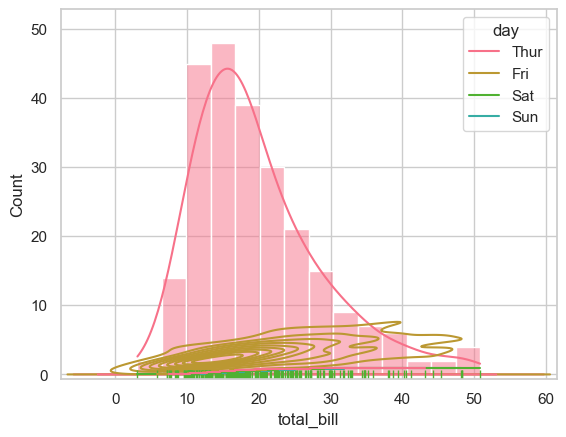

In [2]:
# Histogram with KDE
sns.histplot(data=tips, x='total_bill', kde=True)

# KDE plot only
sns.kdeplot(data=tips, x='total_bill')

# Multiple distributions
sns.kdeplot(data=tips, x='total_bill', hue='time')

# 2D KDE plot
sns.kdeplot(data=tips, x='total_bill', y='tip')

# Distribution plot (deprecated, use histplot)
# sns.distplot(tips['total_bill'])  # Old version

# Rug plot (shows individual observations)
sns.rugplot(data=tips, x='total_bill')

# ECDF (Empirical Cumulative Distribution Function)
sns.ecdfplot(data=tips, x='total_bill', hue='day')


## 3. Categorical Plots


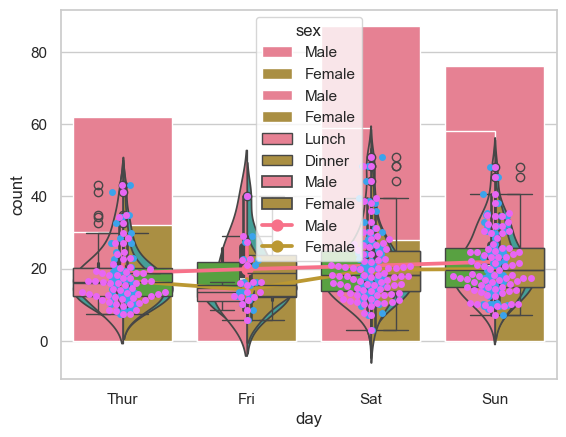

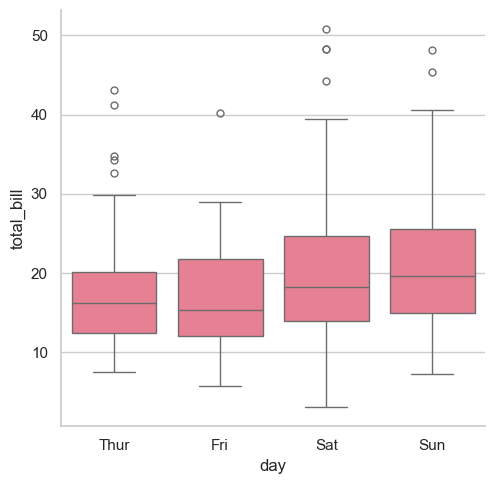

In [3]:
# Count plot (bar chart of counts)
sns.countplot(data=tips, x='day')
sns.countplot(data=tips, x='day', hue='sex')

# Bar plot (with confidence intervals)
sns.barplot(data=tips, x='day', y='total_bill')
sns.barplot(data=tips, x='day', y='total_bill', hue='sex')

# Box plot
sns.boxplot(data=tips, x='day', y='total_bill')
sns.boxplot(data=tips, x='day', y='total_bill', hue='time')

# Violin plot (box plot + KDE)
sns.violinplot(data=tips, x='day', y='total_bill')
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True)

# Strip plot (scatter plot for categories)
sns.stripplot(data=tips, x='day', y='total_bill')

# Swarm plot (non-overlapping strip plot)
sns.swarmplot(data=tips, x='day', y='total_bill')

# Point plot (shows point estimates and confidence intervals)
sns.pointplot(data=tips, x='day', y='total_bill', hue='sex')

# Categorical plot (general function)
sns.catplot(data=tips, x='day', y='total_bill', kind='box')
# kind options: strip, swarm, box, violin, boxen, point, bar, count


In [ ]:
## 4. Relational Plots


In [ ]:
# Scatter plot
sns.scatterplot(data=tips, x='total_bill', y='tip')
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='sex', size='size')

# Line plot
# Create sample time series data
dates = pd.date_range('2023-01-01', periods=100)
ts_data = pd.DataFrame({
    'date': dates,
    'value': np.cumsum(np.random.randn(100)),
    'category': np.random.choice(['A', 'B'], 100)
})
sns.lineplot(data=ts_data, x='date', y='value', hue='category')

# Relational plot (general function)
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', hue='time')
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', col='time')  # Separate subplots
# kind options: scatter, line

## 5. Matrix Plots

In [ ]:
# Heatmap
correlation_matrix = tips.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Heatmap with custom formatting
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f',
            cmap='RdBu_r',
            square=True, 
            linewidths=0.5)

# Clustermap (hierarchical clustering)
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Pivot table heatmap
flight_data = sns.load_dataset("flights")
flight_pivot = flight_data.pivot("month", "year", "passengers")
sns.heatmap(flight_pivot, annot=True, fmt="d", cmap="YlOrRd")

## 6. Regression Plots

In [ ]:
# Basic regression plot
sns.regplot(data=tips, x='total_bill', y='tip')

# Regression plot without confidence interval
sns.regplot(data=tips, x='total_bill', y='tip', ci=None)

# Linear regression with different estimators
sns.regplot(data=tips, x='total_bill', y='tip', order=2)  # Polynomial fit

# Multiple regression lines by category
sns.lmplot(data=tips, x='total_bill', y='tip', hue='time')

# Separate plots by category
sns.lmplot(data=tips, x='total_bill', y='tip', col='time')

# Residual plot (for model diagnostics)
sns.residplot(data=tips, x='total_bill', y='tip')

## 7. Multi-plot Grids

In [ ]:
# FacetGrid - custom plotting on subplots
g = sns.FacetGrid(tips, col='time', row='sex', margin_titles=True)
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()

# PairGrid - all pairwise relationships
g = sns.PairGrid(iris, hue='species')
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.add_legend()

# Pairplot (simplified PairGrid)
sns.pairplot(iris, hue='species')

# JointGrid - bivariate plot with marginals
g = sns.JointGrid(data=tips, x='total_bill', y='tip')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot)

# Jointplot (simplified JointGrid)
sns.jointplot(data=tips, x='total_bill', y='tip', kind='scatter')
# kind options: scatter, kde, hist, hex, reg, resid

## 8. Color Palettes

In [ ]:
# Qualitative palettes (for categories)
sns.color_palette("husl", 8)      # Good for many categories
sns.color_palette("Set1", 8)      # Distinct colors
sns.color_palette("colorblind")   # Colorblind-safe

# Sequential palettes (for continuous data)
sns.color_palette("Blues", 8)
sns.color_palette("viridis", 8)   # Perceptually uniform

# Diverging palettes (for data with meaningful center)
sns.color_palette("RdBu", 8)
sns.color_palette("coolwarm", 8)

# Set palette for current session
sns.set_palette("husl")

# Use palette in plot
with sns.color_palette("husl", 4):
    sns.barplot(data=tips, x='day', y='total_bill')

# Custom palette
custom_palette = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4"]
sns.set_palette(custom_palette)

# View palette
sns.palplot(sns.color_palette("viridis", 8))

## 9. Customization and Styling

In [ ]:
# Figure size (must be set before plotting)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tips, x='total_bill', y='tip')

# Multiple ways to customize
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=ax)
ax.set_title("Tips vs Total Bill")
ax.set_xlabel("Total Bill ($)")
ax.set_ylabel("Tip ($)")

# Seaborn themes/styles
sns.set_style("darkgrid")   # darkgrid, whitegrid, dark, white, ticks
sns.set_context("talk")     # paper, notebook, talk, poster

# Custom styling with matplotlib
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.title("Tips vs Total Bill", fontsize=16, fontweight='bold')
plt.xlabel("Total Bill ($)", fontsize=12)
plt.ylabel("Tip ($)", fontsize=12)
plt.grid(True, alpha=0.3)

# Save high-quality figures
plt.savefig('my_plot.png', dpi=300, bbox_inches='tight', facecolor='white')

# Remove spines
sns.despine()  # Remove top and right spines
sns.despine(left=True)  # Also remove left spine

## 10. Quick Reference

### Key Function Categories

| Function Type | Functions | Use Case |
|---------------|-----------|----------|
| **Distribution** | `histplot`, `kdeplot`, `ecdfplot`, `rugplot` | Show data distribution |
| **Categorical** | `barplot`, `countplot`, `boxplot`, `violinplot`, `stripplot`, `swarmplot` | Compare categories |
| **Relational** | `scatterplot`, `lineplot` | Show relationships |
| **Matrix** | `heatmap`, `clustermap` | Show correlation matrices |
| **Regression** | `regplot`, `lmplot`, `residplot` | Linear relationships |
| **Multi-plot** | `FacetGrid`, `pairplot`, `jointplot` | Multiple related plots |

### Most Commonly Used Functions

```python
# For quick exploration
sns.pairplot(df, hue='category')
sns.heatmap(df.corr(), annot=True)
sns.boxplot(data=df, x='category', y='value')

# For presentations
sns.barplot(data=df, x='category', y='value')
sns.scatterplot(data=df, x='x', y='y', hue='category', size='size')
sns.lineplot(data=df, x='time', y='value', hue='category')
```

### Remember
- Always set style first: `sns.set_style("whitegrid")`
- Seaborn works best with "tidy" data (long format)
- Use `hue`, `style`, `size` for additional dimensions
- Combine with matplotlib for fine-tuning